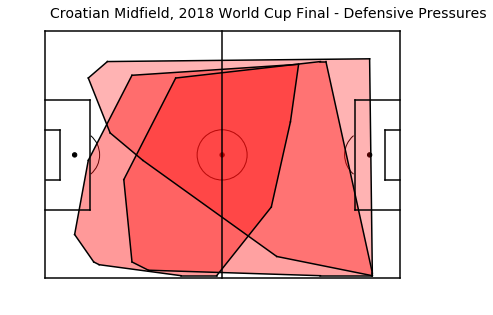

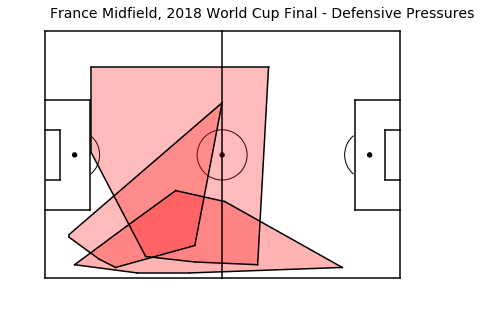

In [27]:
from scipy.spatial import ConvexHull

import json 
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.patches import Arc


%matplotlib inline


def convexHullPressureGenerator(jsonName, playerNames, matchName, title):
    
    #Create figure
    fig=plt.figure()
    fig.set_size_inches(7, 5)
    ax=fig.add_subplot(1,1,1)
    makePitchMarkings(fig, ax, matchName, title)
    
    with open(jsonName,'r') as f:
        data = json.load(f) #loads json in form of dictionaries 
        f.close()
    
    # This puts in all the players we want to get into a dictionary for easy access
    playerDictionary = {}
    for player in playerNames:
        playerDictionary[player] = [] 
    
    #contains  pressure events
    pressureData = []  
    
    # a pressure eventData will contain the following strucure
    # [playerName (0), location (1), half(2)] 
    eventData = [] 
    
    player = "" 
    location = [] 
    half = 1
    complete = True

    #JSON Data is from StatsBomb open-source data, find JSON structure in Pass-Map-Trials

    for i in range(0, len(data)):
        if("Half End" in data[i]):
            half = 2
        if("pass" in data[i]):
            
            location = data[i]["location"]
            player = data[i]["player"]["name"]
            eventData = [player, location, half]
            pressureData.append(eventData)
            
    # this next section reduces pressureData into only the players passed in by user     
    #the dictionary created before helps here     
    for i in range(0, len(pressureData)):
        if(pressureData[i][0] in playerDictionary):
            playersPressures = playerDictionary[pressureData[i][0]] # accesses list stored in dict
            playersPressures.append(pressureData[i][1]) # appends just the location of pressures for a given player
            playerDictionary[pressureData[i][0]] = playersPressures #restores 
            
        
    # At this point , the playersDictionary is a dictionary that stores 
    # the player name , and the associated list of all pressures 
    
    locations = []
    for player in playerDictionary:
        
        locations = playerDictionary[player] # list of coordinates
        #convex hulls need at least 2 points, if this isnt the case, we'll just ignore that player's contribution
        
        points = np.array(locations) # Apparently convex hulls like numpy arrays, not lists
        try: 
            hull = ConvexHull(locations)
            
        except: 
            pass
        
        try:
            for simplex in hull.simplices:
                
                plt.plot(points[simplex,0], points[simplex,1], 'k-') #plots the outside edges
                plt.fill(points[hull.vertices,0], points[hull.vertices,1], 'red', alpha=0.05)      #fills a transparent red          
                
        except:
            pass
       
    ## THIS NEXT SECTION JUST MAKES THE SOCCER FIELD -- FEEL FREE TO SKIP
    
    
        
    
croatianMidfield = ["Luka Modrić", "Ivan Rakitić", "Marcelo Brozović"]
franceMidfield = ["Paul Pogba", "N'Golo Kanté", "Blaise Matuidi"]

convexHullPressureGenerator("8658.json", croatianMidfield, "2018 World Cup Final", "Croatian Midfield")
convexHullPressureGenerator("8658.json", franceMidfield, "2018 World Cup Final", "France Midfield")

    

In [26]:
def makePitchMarkings(fig, ax, matchName, title):

    #Pitch Outline & Centre Line
    plt.plot([0,0],[0,90], color="black")
    plt.plot([0,130],[90,90], color="black")
    plt.plot([130,130],[90,0], color="black")
    plt.plot([130,0],[0,0], color="black")
    plt.plot([65,65],[0,90], color="black")

    #Left Penalty Area
    plt.plot([16.5,16.5],[65,25],color="black")
    plt.plot([0,16.5],[65,65],color="black")
    plt.plot([16.5,0],[25,25],color="black")

    #Right Penalty Area
    plt.plot([130,113.5],[65,65],color="black")
    plt.plot([113.5,113.5],[65,25],color="black")
    plt.plot([113.5,130],[25,25],color="black")

    #Left 6-yard Box
    plt.plot([0,5.5],[54,54],color="black")
    plt.plot([5.5,5.5],[54,36],color="black")
    plt.plot([5.5,0.5],[36,36],color="black")

    #Right 6-yard Box
    plt.plot([130,124.5],[54,54],color="black")
    plt.plot([124.5,124.5],[54,36],color="black")
    plt.plot([124.5,130],[36,36],color="black")

    #Prepare Circles
    centreCircle = plt.Circle((65,45),9.15,color="black",fill=False)
    centreSpot = plt.Circle((65,45),0.8,color="black")
    leftPenSpot = plt.Circle((11,45),0.8,color="black")
    rightPenSpot = plt.Circle((119,45),0.8,color="black")

    #Draw Circles
    ax.add_patch(centreCircle)
    ax.add_patch(centreSpot)
    ax.add_patch(leftPenSpot)
    ax.add_patch(rightPenSpot)

    #Prepare Arcs
    leftArc = Arc((11,45),height=18.3,width=18.3,angle=0,theta1=310,theta2=50,color="black")
    rightArc = Arc((119,45),height=18.3,width=18.3,angle=0,theta1=130,theta2=230,color="black")

    #Draw Arcs
    ax.add_patch(leftArc)
    ax.add_patch(rightArc)

    #Tidy Axes
    plt.axis('off')
    
    header = title + ", " + matchName + " - Defensive Pressures"
    ax.text(2,95, header ,color="black",size="14")

[ 6 12]
[6 9]
[23  5]
[10 12]
[10 15]
[13  5]
[13 15]
[14 23]
[0 9]
[ 0 14]


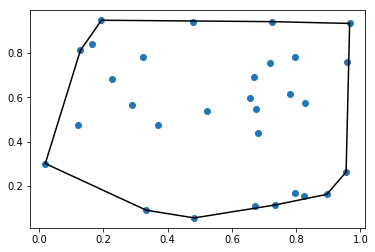

In [7]:
# This is just helpful information about how to use convex hulls from the documentation



from scipy.spatial import ConvexHull, convex_hull_plot_2d
points = np.random.rand(30, 2)   # 30 random points in 2-D
hull = ConvexHull(points)

import matplotlib.pyplot as plt
plt.plot(points[:,0], points[:,1], 'o')
for simplex in hull.simplices:
    print(simplex)
    plt.plot(points[simplex, 0], points[simplex, 1], 'k-')
    
plt.show()